In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, classification_report, plot_confusion_matrix
from catboost import CatBoostClassifier
from tpot import TPOTClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
ds_train = pd.read_csv("train.csv")
ds_test = pd.read_csv("test.csv")

In [4]:
ds_train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,6,0,0,3,0,0,0,Class_1
99996,99996,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,7,0,0,0,2,0,0,0,10,0,0,0,Class_2
99997,99997,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0,Class_3
99998,99998,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,3,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0,Class_2


In [5]:
ds_test

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,0,0,0,0,0,0,0,1,5,0,2,0,0,0,7,5,0,0,0,0,6,1,0,0,7,2,0,0,2,0,0,0,3,0,0,0,0,1,0,1,0,1,0,0,0,3,0,0,3,0
49996,149996,0,0,0,0,0,0,10,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,11,0,0,0,0,1,0,0,0,0,0,3
49997,149997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,2,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,149998,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1


In [6]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)

In [7]:
null_values(ds_train)

In [8]:
null_values(ds_test)

In [9]:
ds_train.drop(columns="id",axis=1, inplace=True)
ds_test.drop(columns="id",axis=1, inplace=True)

In [10]:
correlation = ds_train.corr()

In [11]:
correlation

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
feature_0,1.00,0.01,-0.01,0.01,-0.00,-0.00,0.00,0.01,-0.00,0.01,0.01,0.01,0.01,-0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,0.02,0.00,0.00,0.00,0.01,0.00,-0.00,0.00,0.01,-0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00
feature_1,0.01,1.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
feature_2,-0.01,0.01,1.00,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.02,-0.00,-0.00,0.01,0.01,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,0.02,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.00,-0.00,0.00,0.01,-0.00,0.02,0.01,-0.00,0.00,0.00,0.00,0.01
feature_3,0.01,0.00,0.01,1.00,0.00,-0.00,0.01,0.01,0.01,0.00,-0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,-0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,-0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.01,-0.01,0.01
feature_4,-0.00,0.01,0.00,0.00,1.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,-0.00,-0.00,-0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.01
feature_5,-0.00,0.00,0.01,-0.00,0.00,1.00,-0.00,0.01,-0.00,0.00,0.00,0.00,-0.00,0.01,-0.00,-0.01,0.01,-0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.01,0.00,-0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,-0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.00,-0.00,0.00,0.01,0.00
feature_6,0.00,0.01,0.00,0.01,0.00,-0.00,1.00,0.01,0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,-0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01
feature_7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,1.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,-0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01
feature_8,-0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.00,1.00,0.00,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.01,0.01,-0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,-0.00,0.00,0.01
feature_9,0.01,-0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,1.00,-0.00,0.00,0.00,0.00,-0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,-0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,-0.00,0.00,0.01,-0.00,0.01,0.01


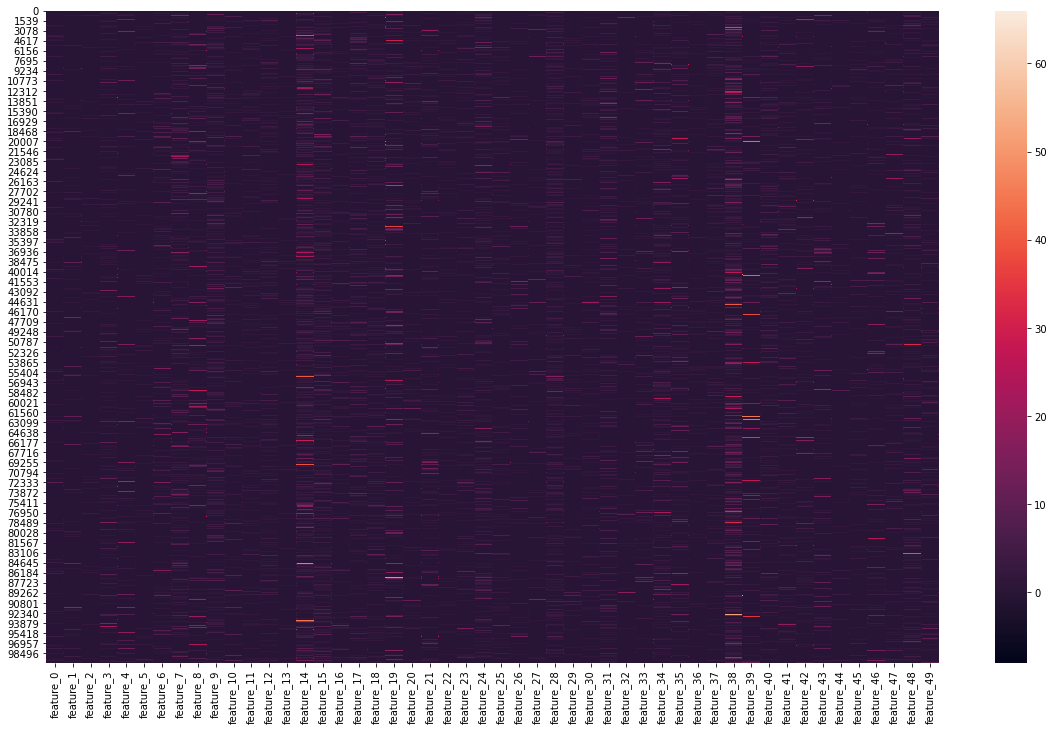

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(ds_train.iloc[:,:-1])
plt.show()

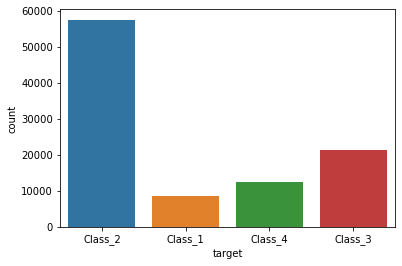

In [13]:
sns.countplot(ds_train["target"])
plt.show()

In [14]:
ds_train["target"].value_counts()

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

In [15]:
X1 = ds_train.iloc[:,:-1]
y1 = ds_train.iloc[:,-1]

smk = SMOTE(random_state=0,n_jobs=-1)
X_bal,y_bal = smk.fit_resample(X1,y1)

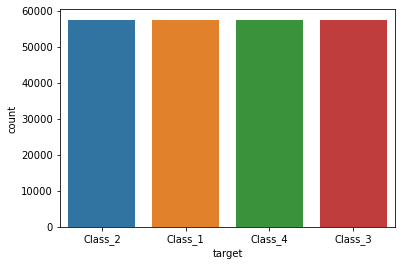

In [16]:
sns.countplot(y_bal)
plt.show()

In [17]:
y_bal.value_counts()

Class_4    57497
Class_1    57497
Class_3    57497
Class_2    57497
Name: target, dtype: int64

In [18]:
type(X_bal)

pandas.core.frame.DataFrame

In [19]:
X = X_bal.values
y = y_bal.values

In [20]:
type(X)

numpy.ndarray

In [21]:
X_test_original = ds_test.iloc[:,:].values

In [22]:
enc = LabelEncoder()

In [23]:
y = enc.fit_transform(y)

In [24]:
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, random_state=0, test_size=0.5)

In [25]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, random_state=0, test_size=0.4)

In [26]:
#skf = StratifiedKFold(n_splits= 10)

In [27]:
#classifier = CatBoostClassifier(task_type="GPU", iterations=2000, random_state=0, eval_metric="Accuracy")

In [28]:
# train_accuracy_score = []
# valid_accuracy_score = []
# log_loss_valid_list = []

# skf.get_n_splits(X,y)

# for train_index, valid_index in skf.split(X,y):
#     X_skf_train, X_skf_valid = X[train_index], X[valid_index]
#     y_skf_train, y_skf_valid = y[train_index], y[valid_index]
    
#     classifier.fit(X_skf_train,y_skf_train)
    
#     train_score = classifier.score(X_skf_train,y_skf_train)
#     valid_score = classifier.score(X_skf_valid,y_skf_valid)
    
#     y_skf_valid_predict_prob = classifier.predict_proba(X_skf_valid)
#     log_loss_valid = log_loss(y_skf_valid,y_skf_valid_predict_prob)
    
#     train_accuracy_score.append(train_score)
#     valid_accuracy_score.append(valid_score)
#     log_loss_valid_list.append(log_loss_valid)

In [29]:
# print(train_accuracy_score)

In [30]:
# print(valid_accuracy_score)

In [31]:
# print(log_loss_valid_list)

In [32]:
sc = StandardScaler()

In [33]:
# lc_bal_data = LazyClassifier()
# lc_bal_data.fit(X_train, X_valid, y_train, y_valid)

In [34]:
#lc = LazyClassifier()
#lc.fit(X_train, X_valid, y_train, y_valid)

In [35]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)
X_test_original = sc.transform(X_test_original)

In [36]:
bnb = BernoulliNB()

In [37]:
bnb.fit(X_train, y_train)
pred_valid_bnb = bnb.predict(X_valid)
pred_test_bnb = bnb.predict(X_test)
pred_test_original_bnb = bnb.predict(X_test_original)

              precision    recall  f1-score   support

           0       0.32      0.15      0.21     28580
           1       0.47      0.62      0.54     28873
           2       0.32      0.22      0.26     28845
           3       0.37      0.56      0.45     28696

    accuracy                           0.39    114994
   macro avg       0.37      0.39      0.36    114994
weighted avg       0.37      0.39      0.36    114994



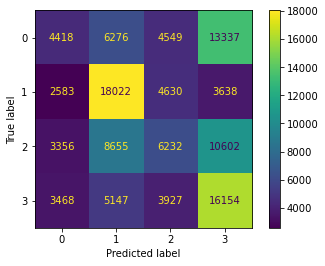

In [61]:
print(classification_report(y_train,bnb.predict(X_train)))
print(plot_confusion_matrix(bnb, X_train, y_train))

              precision    recall  f1-score   support

           0       0.33      0.15      0.21     17452
           1       0.47      0.63      0.54     17194
           2       0.32      0.22      0.26     17063
           3       0.37      0.56      0.45     17287

    accuracy                           0.39     68996
   macro avg       0.37      0.39      0.36     68996
weighted avg       0.37      0.39      0.36     68996



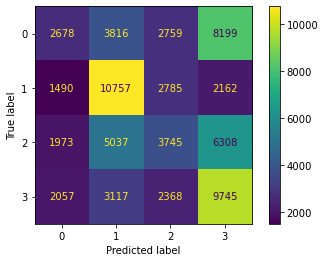

In [55]:
print(classification_report(y_valid,pred_valid_bnb))
print(plot_confusion_matrix(bnb, X_valid, y_valid))

              precision    recall  f1-score   support

           0       0.32      0.15      0.21     11465
           1       0.47      0.63      0.54     11430
           2       0.32      0.22      0.26     11589
           3       0.37      0.56      0.45     11514

    accuracy                           0.39     45998
   macro avg       0.37      0.39      0.36     45998
weighted avg       0.37      0.39      0.36     45998



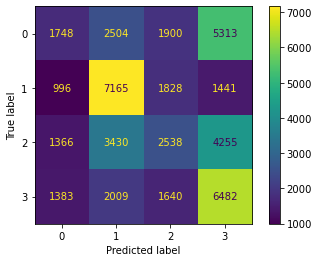

In [51]:
print(classification_report(y_test, pred_test_bnb))
print(plot_confusion_matrix(bnb, X_test, y_test))

In [56]:
pred_valid_bnb_df = pd.DataFrame(pred_valid_bnb)
pred_test_bnb_df = pd.DataFrame(pred_test_bnb)
pred_test_original_bnb_df = pd.DataFrame(pred_test_original_bnb)

In [57]:
knc = KNeighborsClassifier(n_jobs=-1)

In [58]:
knc.fit(X_train, y_train)
pred_valid_knc = knc.predict(X_valid)
pred_test_knc = knc.predict(X_test)
pred_test_original_knc = knc.predict(X_test_original)

In [59]:
print(classification_report(y_valid,pred_valid_knc))
print(plot_confusion_matrix(knc, X_valid, y_valid))

              precision    recall  f1-score   support

           0       0.55      0.82      0.66     17452
           1       0.57      0.24      0.34     17194
           2       0.54      0.50      0.52     17063
           3       0.59      0.67      0.62     17287

    accuracy                           0.56     68996
   macro avg       0.56      0.56      0.54     68996
weighted avg       0.56      0.56      0.54     68996



KeyboardInterrupt: 

In [ ]:
print(classification_report(y_test, pred_test_knc))
print(plot_confusion_matrix(knc, X_test, y_test))

In [ ]:
pred_valid_knc_df = pd.DataFrame(pred_valid_knc)
pred_test_knc_df = pd.DataFrame(pred_test_knc)
pred_test_original_knc_df = pd.DataFrame(pred_test_original_knc)

In [ ]:
lr = LogisticRegression(n_jobs=-1)

In [ ]:
lr.fit(X_train, y_train)
pred_valid_lr = lr.predict(X_valid)
pred_test_lr = lr.predict(X_test)
pred_test_original_lr = lr.predict(X_test_original)

In [ ]:
print(classification_report(y_valid,pred_valid_lr))
print(plot_confusion_matrix(lr, X_valid, y_valid))

In [ ]:
print(classification_report(y_test, pred_test_lr))
print(plot_confusion_matrix(lr, X_test, y_test))

In [ ]:
pred_valid_lr_df = pd.DataFrame(pred_valid_lr)
pred_test_lr_df = pd.DataFrame(pred_test_lr)
pred_test_original_lr_df = pd.DataFrame(pred_test_original_lr)

In [ ]:
lsvc = LinearSVC()

In [ ]:
lsvc.fit(X_train, y_train)
pred_valid_lsvc = lsvc.predict(X_valid)
pred_test_lsvc = lsvc.predict(X_test)
pred_test_original_lsvc = lsvc.predict(X_test_original)

In [ ]:
print(classification_report(y_valid,pred_valid_lsvc))
print(plot_confusion_matrix(lsvc, X_valid, y_valid))

In [ ]:
print(classification_report(y_test, pred_test_lsvc))
print(plot_confusion_matrix(lsvc, X_test, y_test))

In [ ]:
pred_valid_lsvc_df = pd.DataFrame(pred_valid_lsvc)
pred_test_lsvc_df = pd.DataFrame(pred_test_lsvc)
pred_test_original_lsvc_df = pd.DataFrame(pred_test_original_lsvc)

In [ ]:
sgdc = SGDClassifier(n_jobs=-1)

In [ ]:
sgdc.fit(X_train, y_train)
pred_valid_sgdc = sgdc.predict(X_valid)
pred_test_sgdc = sgdc.predict(X_test)
pred_test_original_sgdc = sgdc.predict(X_test_original)

In [ ]:
print(classification_report(y_valid,pred_valid_sgdc))
print(plot_confusion_matrix(sgdc, X_valid, y_valid))

In [ ]:
print(classification_report(y_test, pred_test_sgdc))
print(plot_confusion_matrix(sgdc, X_test, y_test))

In [ ]:
pred_valid_sgdc_df = pd.DataFrame(pred_valid_sgdc)
pred_test_sgdc_df = pd.DataFrame(pred_test_sgdc)
pred_test_original_sgdc_df = pd.DataFrame(pred_test_original_sgdc)

In [ ]:
pred_valid_sgdc_df

In [ ]:
df_valid = pd.concat([pred_valid_bnb_df, pred_valid_knc_df, pred_valid_lr_df, pred_valid_lsvc_df, pred_valid_sgdc_df],axis=1)
df_test = pd.concat([pred_test_bnb_df, pred_test_knc_df, pred_test_lr_df, pred_test_lsvc_df, pred_test_sgdc_df],axis=1)
df_test_original = pd.concat([pred_test_original_bnb_df, pred_test_original_knc_df, pred_test_original_lr_df, pred_test_original_lsvc_df, pred_test_original_sgdc_df],axis=1)

In [ ]:
df_valid

In [ ]:
df_test

In [ ]:
df_test_original

In [ ]:
df_valid = df_valid.iloc[:,:].values
df_test = df_test.iloc[:,:].values
df_test_original = df_test_original.iloc[:,:].values

In [ ]:
sc2 = StandardScaler()

In [ ]:
df_valid = sc.fit_transform(df_valid)
df_test = sc.transform(df_test)
df_test_original = sc.transform(df_test_original)

In [ ]:
df_valid

In [ ]:
df_test

In [ ]:
df_test_original

In [ ]:
xgb = XGBClassifier(n_jobs=-1)

In [ ]:
xgb.fit(df_valid,y_valid)
print(xgb.score(df_valid, y_valid))
print(xgb.score(df_test, y_test))

In [ ]:
print(classification_report(df_valid,xgb.predict(df_valid)))
print(plot_confusion_matrix(xgb, df_valid, df_valid))

In [ ]:
print(classification_report(df_test,xgb.predict(df_test)))
print(plot_confusion_matrix(xgb, df_test, df_test))

In [ ]:
prob_test_xgb = xgb.predict_proba(df_test)
prob_test_original_xgb = xgb.predict_proba(df_test_original)

In [ ]:
log_loss(y_test,prob_test_xgb)

In [ ]:
bnb2 = BernoulliNB()

In [ ]:
bnb2.fit(df_valid,y_valid)
print(bnb2.score(df_valid, y_valid))
print(bnb2.score(df_test, y_test))

In [ ]:
print(classification_report(df_valid,bnb2.predict(df_valid)))
print(plot_confusion_matrix(bnb2, df_valid, df_valid))

In [ ]:
print(classification_report(df_test,bnb2.predict(df_test)))
print(plot_confusion_matrix(bnb2, df_test, df_test))

In [ ]:
prob_test_bnb2 = bnb2.predict_proba(df_test)
prob_test_original_bnb2 = bnb2.predict_proba(df_test_original)

In [ ]:
log_loss(y_test,prob_test_bnb2)

In [ ]:
y_predict = xgb.predict_proba(df_test_original)

In [ ]:
y_predict

In [ ]:
target = pd.DataFrame(y_predict, columns=["Class_1","Class_2","Class_3","Class_4"])

In [ ]:
target

In [ ]:
id_test_data = pd.read_csv("test.csv")

In [ ]:
id_test = id_test_data.filter(["id"],axis=1) 

In [ ]:
id_test

In [ ]:
predicted = pd.concat([id_test, target], axis=1)

In [ ]:
predicted

In [ ]:
# predicted.to_csv("predicted_blending_balance_XGB_scale.csv")